#  MIE 479 Capstone - Problem Definition

Lenders want to lend. Where do lenders get the money to lend you money for a house? In Canada, banks use a mix of deposits, government-sponsored mortgage-backed securities (MBS), private-label MBS and covered bonds (i.e. bonds issued by the bank that offer recourse to the underlying loans and the issuer). 

However, not all lenders are banks. A third-party lender is a financial institution or entity that provides loans or credit to borrowers but is not the direct source of the funds used for those loans. Instead of using its capital, a third-party lender often relies on funding from other institutions, such as banks, to provide the loans. These lenders act as intermediaries, originating loans for various purposes, including mortgages, auto loans, or personal loans. They may later sell or transfer the loans to investors or other financial institutions.


### What is a Bank Structured Finance Warehouse Facility?
A bank-structured finance warehouse facility, also known as a warehouse line of credit, is a financial arrangement provided by a bank or financial institution to third-party lenders. It allows the third-party lenders to fund their loan originations up to the warehouse limit.

#### How the Process Typically Works

1. Third-party lenders (some examples include residential mortgages, auto finance, equipment finance, credit card advances, personal loans, and unsecured credit facilities) originate loans from borrowers.

2. Instead of using their capital to fund these loans, lenders utilize a warehouse line of credit from a bank.

3. The bank provides a revolving line of credit to the lender (based upon eligibility criteria and an advance rate), secured by the loans to be funded as collateral.

4. The lender uses the funds from the bank's warehouse facility to cover the costs of originating and funding the loans.

5. Once the lender has a sufficient pool of loans, it usually bundles them together and sells them to investors.

6. The proceeds from the loan sales are used to repay the bank's warehouse line of credit.

7. The cycle repeats as the lender continues to originate and sell loans, replenishing the warehouse facility.

#### Bank Structured Finance Warehouse Facilities Offer Several Advantages to Third-Party Lenders:

- **Accessible short-term funding**: Lenders can access funds quickly via the line of credit to originate loans without tying up their own capital.
  
- **Scalability**: The size of the warehouse facility can vary based on the lender's needs, allowing for flexibility in loan origination volume.
  
- **Cost-effective**: Warehouse lines of credit usually offer lower interest rates than other short-term borrowing options.
  
- **Liquidity**: By providing access to capital, warehouse facilities ensure lenders have the necessary liquidity to meet their loan funding requirements.

It's important to note that the specific terms and conditions of a bank structured finance warehouse facility can vary based on the agreement between the lender and the bank. Lenders need to meet certain eligibility criteria and maintain compliance with industry regulations to access these facilities.

Source - https://www.taosolutions.ca/Bank-Structured-Finance-Warehouse-Facilities

#### The third-party lender's problem

Each week, the lender originates loans. During this time, the loans are held on their balance sheet. They wish to take these loans off their balance sheets using their lending facilities. The lender wishes to fund assets using the facilities. Here are some considerations:
- Each loan can only be assigned to one facility
- Each facility has some overall principal balance limit (the warehouse limit)
- Each facility has its own set of conditions that must be obeyed by any loans funded by the facility. For example, 
    * The balanced weighted average credit score of the loans in the pool must be above 500
    * The % of loans with loan-to-value (LTV) > 90% must be less than 30%
    * First Time Home Buyer Loans must be greater than 10% of the loans in the facility
    * The % of loans with at least two borrowers must exceed 60% 
    * etc

The facility may already have existing loans secured. These loans also count in the conditions mentioned above. The lender aims to find the allocation of week's $N$ loans to a set of $M$ facilities such that the resulting number of loans funded is maximized. It may be the case that there are many allocations to the facilities that maximize the number of loans funded. In this case, there are other considerations that can be made. For example, for each facility, how well do the cashflows obtained from the underlying mortgage pool match the interest payments required by the facilities? How diversified is the allocation among all the facilities? Is there a preference for optimal allocations that fill fewer facilities? 

The goal of this project is to develop a tool that accepts:
* a set of loans
* data describing the facilities and their conditions

and outputs the loan facility assignments. 

To get started, the remainder of this notebook looks at mortgage originations by Fannie Mae from Q1 2024. This dataset can be used to develop and test your proposed tool. The tool will be judged based on its algorithmic effectiveness and ease of use.



# Fannie Mae Mortgage Lending Data

From wikipedia:

"The Federal National Mortgage Association (FNMA), commonly known as Fannie Mae, is a United States government-sponsored enterprise (GSE) and, since 1968, a publicly traded company. Founded in 1938 during the Great Depression as part of the New Deal,[2] the corporation's purpose is to expand the secondary mortgage market by securitizing mortgage loans in the form of mortgage-backed securities (MBS),[3] allowing lenders to reinvest their assets into more lending and in effect increasing the number of lenders in the mortgage market by reducing the reliance on locally based savings and loan associations (or "thrifts").[4] Its brother organization is the Federal Home Loan Mortgage Corporation (FHLMC), better known as Freddie Mac.

In 2024, with over $4.3 trillion in assets, Fannie Mae is the largest company in the United States and the fifth largest company in the world, by assets.[5][6] Fannie Mae was ranked number 27 on the Fortune 500 rankings of the largest United States corporations by total revenue and was ranked number 58 on the Fortune Global 500 rankings of the largest global corporations by total revenue.[5][6] In terms of profit, Fannie Mae is the 15th most profitable company in the United States and the 33rd most profitable in the world.[5][6]"

references:

2.  Pickert, Kate (July 14, 2008). "A Brief History of Fannie Mae and Freddie Mac". Time. Archived from the original on October 6, 2008.

3.  "About Fannie Mae". Fendral National Mortgage Association. October 7, 2008. Archived from the original on October 26, 2008. Retrieved October 28, 2008.
4.  Fabozzi, Frank J.; Modigliani, Franco (1992), Mortgage and Mortgage-backed Securities Markets, Harvard Business School Press, p. 2, ISBN 0-87584-322-0
5.  "Fortune Global 500". Fortune. Retrieved August 5, 2024.
6.  "Fortune 500". Fortune. Retrieved August 5, 2024


In [21]:
import pandas as pd
import os
import numpy as np
### Define the column names and column data types (classes)
lppub_column_names = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                      "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                      "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                      "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                      "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                      "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                      "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                      "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                      "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                      "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                      "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                      "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                      "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                      "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                      "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                      "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                      "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                      "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                      "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                      "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                      "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                      "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                      "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                      "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                      "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                      "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                      "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                      "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                      "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                      "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB", 
                      "PAYMENT_DEFERRAL_MOD_EVENT_FLAG", "INTEREST_BEARING_UPB"]

# Updating column classes, converting integers to 'float' where NaN is expected
lppub_column_classes = {"POOL_ID": str, "LOAN_ID": str, "ACT_PERIOD": str, "CHANNEL": str, "SELLER": str, "SERVICER": str,
                        "MASTER_SERVICER": str, "ORIG_RATE": float, "CURR_RATE": float, "ORIG_UPB": float, "ISSUANCE_UPB": float,
                        "CURRENT_UPB": float, "ORIG_TERM": "Int64", "ORIG_DATE": str, "FIRST_PAY": str, "LOAN_AGE": "Int64",
                        "REM_MONTHS": "Int64", "ADJ_REM_MONTHS": "Int64", "MATR_DT": str, "OLTV": float, "OCLTV": float,
                        "NUM_BO": "Int64", "DTI": float, "CSCORE_B": "Int64", "CSCORE_C": "Int64", "FIRST_FLAG": str, "PURPOSE": str,
                        "PROP": str, "NO_UNITS": "Int64", "OCC_STAT": str, "STATE": str, "MSA": str, "ZIP": str, "MI_PCT": float,
                        "PRODUCT": str, "PPMT_FLG": str, "IO": str, "FIRST_PAY_IO": str, "MNTHS_TO_AMTZ_IO": "Int64",
                        "DLQ_STATUS": str, "PMT_HISTORY": str, "MOD_FLAG": str, "MI_CANCEL_FLAG": str, "Zero_Bal_Code": str,
                        "ZB_DTE": str, "LAST_UPB": float, "RPRCH_DTE": str, "CURR_SCHD_PRNCPL": float, "TOT_SCHD_PRNCPL": float,
                        "UNSCHD_PRNCPL_CURR": float, "LAST_PAID_INSTALLMENT_DATE": str, "FORECLOSURE_DATE": str,
                        "DISPOSITION_DATE": str, "FORECLOSURE_COSTS": float, "PROPERTY_PRESERVATION_AND_REPAIR_COSTS": float,
                        "ASSET_RECOVERY_COSTS": float, "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS": float,
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY": float, "NET_SALES_PROCEEDS": float,
                        "CREDIT_ENHANCEMENT_PROCEEDS": float, "REPURCHASES_MAKE_WHOLE_PROCEEDS": float,
                        "OTHER_FORECLOSURE_PROCEEDS": float, "NON_INTEREST_BEARING_UPB": float, "PRINCIPAL_FORGIVENESS_AMOUNT": float,
                        "ORIGINAL_LIST_START_DATE": str, "ORIGINAL_LIST_PRICE": float, "CURRENT_LIST_START_DATE": str,
                        "CURRENT_LIST_PRICE": float, "ISSUE_SCOREB": "Int64", "ISSUE_SCOREC": "Int64", "CURR_SCOREB": "Int64",
                        "CURR_SCOREC": "Int64", "MI_TYPE": str, "SERV_IND": str, "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT": float,
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT": float, "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS": float,
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS": float, "HOMEREADY_PROGRAM_INDICATOR": str,
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT": float, "RELOCATION_MORTGAGE_INDICATOR": str,
                        "ZERO_BALANCE_CODE_CHANGE_DATE": str, "LOAN_HOLDBACK_INDICATOR": str, "LOAN_HOLDBACK_EFFECTIVE_DATE": str,
                        "DELINQUENT_ACCRUED_INTEREST": float, "PROPERTY_INSPECTION_WAIVER_INDICATOR": str,
                        "HIGH_BALANCE_LOAN_INDICATOR": str, "ARM_5_YR_INDICATOR": str, "ARM_PRODUCT_TYPE": str,
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET": "Int64", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET": "Int64",
                        "INTEREST_RATE_CHANGE_DATE": str, "PAYMENT_CHANGE_DATE": str, "ARM_INDEX": str,
                        "ARM_CAP_STRUCTURE": str, "INITIAL_INTEREST_RATE_CAP": float, "PERIODIC_INTEREST_RATE_CAP": float,
                        "LIFETIME_INTEREST_RATE_CAP": float, "MARGIN": float, "BALLOON_INDICATOR": str,
                        "PLAN_NUMBER": str, "FORBEARANCE_INDICATOR": str, "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR": str,
                        "DEAL_NAME": str, "RE_PROCS_FLAG": str, "ADR_TYPE": str, "ADR_COUNT": "Int64", "ADR_UPB": float, 
                        "PAYMENT_DEFERRAL_MOD_EVENT_FLAG": str, "INTEREST_BEARING_UPB": float}

### Function to load the Loan Performance file
def load_lppub_file(filename, col_names, col_classes):
    return pd.read_csv(filename, delimiter='|', names=col_names, dtype=col_classes)

### Define the starting and ending files
starting_file = 96  # Starts at 2024Q1
ending_file = 96   # Ends at 2024Q1

### Sequentially read in and combine the files into one DataFrame
lppub_file = pd.DataFrame()  # Initialize an empty DataFrame to store all data

for file_number in range(starting_file, ending_file + 1):
    # Set up file names
    file_year = file_number // 4
    file_year = f'{file_year:02}'
    file_year = f'20{file_year}'
    file_qtr = (file_number % 4) + 1
    file_qtr = f'Q{file_qtr}'
    file_name = os.path.join('..', 'data',  f'{file_year}{file_qtr}.csv')


    # Load the file and append it to the DataFrame
    file_data = load_lppub_file(file_name, lppub_column_names, lppub_column_classes)
    
    if lppub_file.empty:
        lppub_file = file_data
    else:
        lppub_file = pd.concat([lppub_file, file_data], ignore_index=True)

# The resulting DataFrame is `lppub_files` containing all the combined data



In [26]:
lppub_file

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,PAYMENT_DEFERRAL_MOD_EVENT_FLAG,INTEREST_BEARING_UPB
0,NaN,000137581448,012024,R,Other,Other,NaN,6.990,6.990,450000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
1,NaN,000137581448,022024,R,Other,Other,NaN,6.990,6.990,450000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
2,NaN,000137581448,032024,R,Other,Other,NaN,6.990,6.990,450000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
3,NaN,000137581449,012024,R,"Pulte Mortgage, L.L.C.",Other,NaN,5.990,5.990,527000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
4,NaN,000137581449,022024,R,"Pulte Mortgage, L.L.C.",Other,NaN,5.990,5.990,527000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376442,NaN,000138004118,032024,B,"United Wholesale Mortgage, LLC","United Wholesale Mortgage, LLC",NaN,6.625,6.625,615000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
376443,NaN,000138004119,032024,R,Other,Other,NaN,6.125,6.125,235000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
376444,NaN,000138004120,032024,R,Other,Other,NaN,6.750,6.750,373000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN
376445,NaN,000138004121,032024,C,NewRez LLC,New Residential Mortgage LLC,NaN,7.490,7.490,114000.0,...,NaN,7,N,NaN,NaN,7,<NA>,NaN,7,NaN


In [27]:

# Ensure interest rate columns are treated as numeric
lppub_file['ORIG_RATE'] = pd.to_numeric(lppub_file['ORIG_RATE'], errors='coerce')
lppub_file['CURR_RATE'] = pd.to_numeric(lppub_file['CURR_RATE'], errors='coerce')

# Select and rename key columns for statistical summary analysis
lppub_base = lppub_file[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'SERVICER', 'ORIG_RATE', 'CURR_RATE',
    'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'LOAN_AGE', 'REM_MONTHS',
    'ADJ_REM_MONTHS', 'MATR_DT', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C',
    'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP', 'MI_PCT',
    'PRODUCT', 'DLQ_STATUS', 'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE',
    'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
    'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS',
    'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'RELOCATION_MORTGAGE_INDICATOR', 'MI_TYPE',
    'SERV_IND', 'RPRCH_DTE', 'LAST_UPB'
]].copy()  # Use .copy() to avoid issues with chained assignments

# Mutate new columns and transform date-related fields using .loc[]
lppub_base.loc[:, 'repch_flag'] = np.where(lppub_base['RPRCH_DTE'].notna(), 1, 0)

lppub_base.loc[:, 'ACT_PERIOD'] = pd.to_datetime(lppub_base['ACT_PERIOD'].str[2:6] + '-' + lppub_base['ACT_PERIOD'].str[0:2] + '-01')
lppub_base.loc[:, 'FIRST_PAY'] = pd.to_datetime(lppub_base['FIRST_PAY'].str[2:6] + '-' + lppub_base['FIRST_PAY'].str[0:2] + '-01')
lppub_base.loc[:, 'ORIG_DATE'] = pd.to_datetime(lppub_base['ORIG_DATE'].str[2:6] + '-' + lppub_base['ORIG_DATE'].str[0:2] + '-01')

# Sort by LOAN_ID and ACT_PERIOD
lppub_base = lppub_base.sort_values(by=['LOAN_ID', 'ACT_PERIOD'])

# Remove the original DataFrame to save memory
del lppub_file

# Split the data into static "Acquisition" variables and dynamic "Performance" variables
acquisitionFile = lppub_base[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'ORIG_RATE', 'ORIG_UPB',
    'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI',
    'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT',
    'STATE', 'ZIP', 'MI_PCT', 'PRODUCT', 'MI_TYPE', 'RELOCATION_MORTGAGE_INDICATOR'
]].rename(columns={
    'CHANNEL': 'ORIG_CHN', 'ORIG_RATE': 'orig_rt', 'ORIG_UPB': 'orig_amt',
    'ORIG_TERM': 'orig_trm', 'ORIG_DATE': 'orig_date', 'FIRST_PAY': 'first_pay',
    'OLTV': 'oltv', 'OCLTV': 'ocltv', 'NUM_BO': 'num_bo', 'DTI': 'dti',
    'FIRST_FLAG': 'FTHB_FLG', 'PURPOSE': 'purpose', 'PROP': 'PROP_TYP',
    'NO_UNITS': 'NUM_UNIT', 'OCC_STAT': 'occ_stat', 'STATE': 'state', 'ZIP': 'zip_3',
    'MI_PCT': 'mi_pct', 'PRODUCT': 'prod_type', 'RELOCATION_MORTGAGE_INDICATOR': 'relo_flg'
})

# Summarize first period of acquisition data
acqFirstPeriod = acquisitionFile.groupby('LOAN_ID').agg(first_period=('ACT_PERIOD', 'max')).reset_index()

# Join the summarized data back to the original data
acqFirstPeriod = acqFirstPeriod.merge(acquisitionFile, how='left', left_on=['LOAN_ID', 'first_period'], right_on=['LOAN_ID', 'ACT_PERIOD'])

# Select the necessary columns
acqFirstPeriod = acqFirstPeriod[[
    'LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm', 'orig_date',
    'first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLG',
    'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'mi_pct', 'prod_type',
    'MI_TYPE', 'relo_flg'
]]

# Reassign acquisitionFile and remove the intermediate DataFrame to save memory
acquisitionFile = acqFirstPeriod
del acqFirstPeriod


## Checking the numbers match the official statistics in FNMA_SF_Loan_Performance_Stat_Summary_Primary.pdf

In [32]:
# number of loans originated in 2024
acquisitionFile['orig_date'] = pd.to_datetime(acquisitionFile['orig_date'], errors='coerce')
sum(acquisitionFile.orig_date.dt.year == 2024)

120666

In [33]:
# outstanding balance of loans originated in 2024 in ($M)
sum(acquisitionFile['orig_amt'].loc[acquisitionFile.orig_date.dt.year == 2024])/(10**6)

39066.932

## Investigating the File

In [34]:
df = acquisitionFile

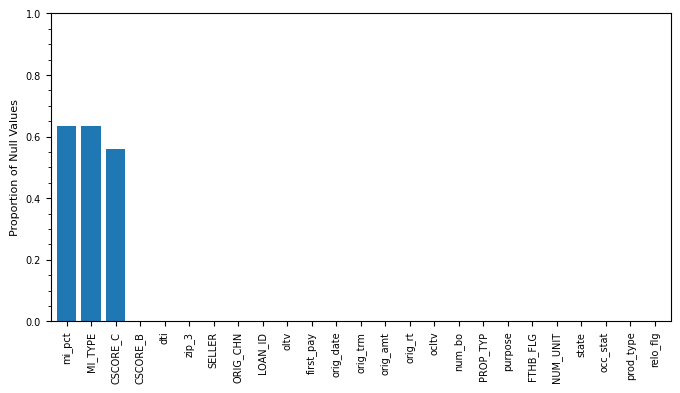

In [35]:
ax = df.isnull().sum().divide(len(df)).sort_values(ascending=False).plot.bar(width=0.8, figsize=(8, 4), fontsize=7)

ax.set_ylim(0, 1)

ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='minor', bottom=True)

ax.set_ylabel('Proportion of Null Values', fontsize=8)

In [36]:
print(f"""
    Number rows: {df.shape[0]}
    Number columns: {df.shape[1]}
    Number null columns: {((df.isnull().sum()/len(df)) == 1).sum()}
""")


    Number rows: 188502
    Number columns: 25
    Number null columns: 0



In [37]:
# Refer to the Single-Family Loan Performance Dataset and Credit Risk Transfer - Glossary and File Layout
df.columns

Index(['LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm',
       'orig_date', 'first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B',
       'CSCORE_C', 'FTHB_FLG', 'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat',
       'state', 'zip_3', 'mi_pct', 'prod_type', 'MI_TYPE', 'relo_flg'],
      dtype='object')